<a href="https://colab.research.google.com/github/Starnatvl/sber-autosubscription/blob/main/notebooks/03_data_cleaning_natvls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q gdown missingno plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr
import gdown

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🎯 Библиотеки загружены успешно!")

# Настройка графиков
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

🎯 Библиотеки загружены успешно!


In [2]:
print("📥 Загрузка ga_sessions.csv...")

url_sessions = "https://drive.google.com/uc?export=download&id=1E-OJ1E_ZliOldsRZgJzL844IV7IlCOqW"
print("⬇️ Загружаем ga_sessions.csv (370 МБ)...")
gdown.download(url_sessions, "ga_sessions.csv", quiet=False)
df_sessions = pd.read_csv("ga_sessions.csv", low_memory=False)

print(f"✅ ga_sessions загружен: {df_sessions.shape}")
print(f"📊 Колонки: {list(df_sessions.columns)}")
print(f"💾 Размер в памяти: {df_sessions.memory_usage(deep=True).sum() / 1024**2:.1f} МБ")

# Быстрый обзор данных
df_sessions.head()

📥 Загрузка ga_sessions.csv...
⬇️ Загружаем ga_sessions.csv (370 МБ)...


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1E-OJ1E_ZliOldsRZgJzL844IV7IlCOqW
From (redirected): https://drive.google.com/uc?export=download&id=1E-OJ1E_ZliOldsRZgJzL844IV7IlCOqW&confirm=t&uuid=eab00f5d-e29a-452f-bf6e-392f8a5ee9a3
To: /content/ga_sessions.csv
100%|██████████| 388M/388M [00:03<00:00, 124MB/s]


✅ ga_sessions загружен: (1860042, 18)
📊 Колонки: ['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number', 'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_category', 'device_os', 'device_brand', 'device_model', 'device_screen_resolution', 'device_browser', 'geo_country', 'geo_city']
💾 Размер в памяти: 1952.1 МБ


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [3]:
print("📥 Загрузка ga_hits.csv...")

url_hits = "https://drive.google.com/uc?export=download&id=1y_014uhvDmD55ZlQ_hC7ptsP9jFecyRd"
print("⬇️ Загружаем ga_hits.csv (3.97 ГБ)...")
gdown.download(url_hits, "ga_hits.csv", quiet=False)
df_hits = pd.read_csv("ga_hits.csv", low_memory=False)

print(f"✅ ga_hits загружен: {df_hits.shape}")
print(f"📊 Колонки: {list(df_hits.columns)}")
print(f"💾 Размер в памяти: {df_hits.memory_usage(deep=True).sum() / 1024**2:.1f} МБ")

# Быстрый обзор данных
df_hits.head()

📥 Загрузка ga_hits.csv...
⬇️ Загружаем ga_hits.csv (3.97 ГБ)...


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1y_014uhvDmD55ZlQ_hC7ptsP9jFecyRd
From (redirected): https://drive.google.com/uc?export=download&id=1y_014uhvDmD55ZlQ_hC7ptsP9jFecyRd&confirm=t&uuid=d45aeb9b-5ad4-4cd7-bf2e-69c81a3dec1f
To: /content/ga_hits.csv
100%|██████████| 4.27G/4.27G [00:48<00:00, 87.8MB/s]


✅ ga_hits загружен: (15726470, 11)
📊 Колонки: ['session_id', 'hit_date', 'hit_time', 'hit_number', 'hit_type', 'hit_referer', 'hit_page_path', 'event_category', 'event_action', 'event_label', 'event_value']
💾 Размер в памяти: 10807.8 МБ


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [4]:
# Проверка дубликатов в обоих датасетах
sessions_duplicates = df_sessions.duplicated(subset=['session_id']).sum()
hits_duplicates = df_hits.duplicated(subset=['session_id', 'hit_number']).sum()

print(f"Дубликаты в сессиях: {sessions_duplicates}")
print(f"Дубликаты в событиях: {hits_duplicates}")

# Удаление дубликатов если есть
if sessions_duplicates > 0:
    df_sessions_clean = df_sessions.drop_duplicates(subset=['session_id'])
    print(f"Удалено {sessions_duplicates} дубликатов из сессий")

if hits_duplicates > 0:
    df_hits_clean = df_hits.drop_duplicates(subset=['session_id', 'hit_number'])
    print(f"Удалено {hits_duplicates} дубликатов из событий")

Дубликаты в сессиях: 0
Дубликаты в событиях: 225862
Удалено 225862 дубликатов из событий


In [5]:
# Анализ пропусков в сессиях
missing_sessions = df_sessions.isnull().sum()
missing_percent = (missing_sessions / len(df_sessions)) * 100

print("Пропуски в сессиях:")
for col, count in missing_sessions[missing_sessions > 0].items():
    print(f"  {col}: {count:,} ({missing_percent[col]:.1f}%)")

Пропуски в сессиях:
  utm_source: 97 (0.0%)
  utm_campaign: 219,603 (11.8%)
  utm_adcontent: 335,615 (18.0%)
  utm_keyword: 1,082,061 (58.2%)
  device_os: 1,070,138 (57.5%)
  device_brand: 367,178 (19.7%)
  device_model: 1,843,704 (99.1%)


In [6]:
# Создаем копию для очистки
df_sessions_clean = df_sessions.copy()

# Объединение даты и времени в datetime
df_sessions_clean['visit_datetime'] = pd.to_datetime(
    df_sessions_clean['visit_date'] + ' ' + df_sessions_clean['visit_time']
)

# Удаление проблемных столбцов с хешами
df_sessions_clean = df_sessions_clean.drop(columns=['utm_source', 'utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_model', 'geo_country', 'device_screen_resolution'])

# Обработка utm_medium - выявление скрытых пропусков
print("Уникальные значения utm_medium до очистки:")
print(df_sessions_clean['utm_medium'].value_counts(dropna=False))

# Замена скрытых пропусков на NaN
df_sessions_clean['utm_medium'] = df_sessions_clean['utm_medium'].replace(['', ' ', 'null', 'NULL'], np.nan)

# Заполнение пропусков в device_os
df_sessions_clean['device_os'] = df_sessions_clean['device_os'].fillna('unknown')
df_sessions_clean['device_os'] = df_sessions_clean['device_os'].replace('(not set)', 'unknown')

# Заполнение пропусков в device_brand
df_sessions_clean['device_brand'] = df_sessions_clean['device_brand'].fillna('other')
df_sessions_clean['device_brand'] = df_sessions_clean['device_brand'].replace('(not set)', 'other')

# Конвертация в категориальные типы
categorical_columns = ['device_browser', 'device_category', 'geo_city']
for col in categorical_columns:
    df_sessions_clean[col] = df_sessions_clean[col].astype('category')

print(f"\nРезультат очистки:")
print(f"Форма данных: {df_sessions_clean.shape}")
print(f"Добавлены столбцы: visit_datetime")
print(f"Удалены столбцы: utm_source, 'utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_model', 'geo_country', 'device_screen_resolution'")
print(f"Конвертированы в category: {categorical_columns}")

Уникальные значения utm_medium до очистки:
utm_medium
banner               552272
cpc                  434794
(none)               300575
cpm                  242083
referral             152050
organic               63034
email                 29240
push                  28035
stories               10582
cpv                    8022
blogger_channel        8015
smartbanner            6794
blogger_stories        4312
cpa                    4279
tg                     4011
app                    2836
post                   2326
smm                    1985
outlook                1332
clicks                  934
blogger_header          771
(not set)               480
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
cbaafe                   47
CPM                      40
yandex_cpc               36
ok_smm                   28
static                

In [7]:
# Унификация значений utm_medium
utm_medium_mapping = {
    # Замена пропусков и неопределенных значений
    '(none)': 'direct',
    '(not set)': 'direct',

    # Объединение похожих каналов
    'banner': 'cpm',
    'fb_smm': 'social',
    'google_cpc': 'cpc',

    # Новые категории
    'tg': 'messenger',

    # Оставляем как есть
    'sber_app': 'sber_app',
    'organic': 'organic',
    'cpc': 'cpc',
    'cpm': 'cpm',
    'referral': 'referral',
    'email': 'email'
}

# Применяем маппинг
df_sessions_clean['utm_medium'] = df_sessions_clean['utm_medium'].map(utm_medium_mapping)

# Заполняем оставшиеся пропуски как 'direct'
df_sessions_clean['utm_medium'] = df_sessions_clean['utm_medium'].fillna('direct')

# Конвертируем в категориальный тип
df_sessions_clean['utm_medium'] = df_sessions_clean['utm_medium'].astype('category')

# Проверяем результат
print("Распределение utm_medium после унификации:")
print(df_sessions_clean['utm_medium'].value_counts(dropna=False))
print(f"\nВсего уникальных значений: {df_sessions_clean['utm_medium'].nunique()}")
print(f"Пропусков: {df_sessions_clean['utm_medium'].isnull().sum()}")

Распределение utm_medium после унификации:
utm_medium
cpm          794355
cpc          434814
direct       382471
referral     152050
organic       63034
email         29240
messenger      4011
social           66
sber_app          1
Name: count, dtype: int64

Всего уникальных значений: 9
Пропусков: 0


Анализ пропусков данных с помощью missingno
Размер данных: (1860042, 12)


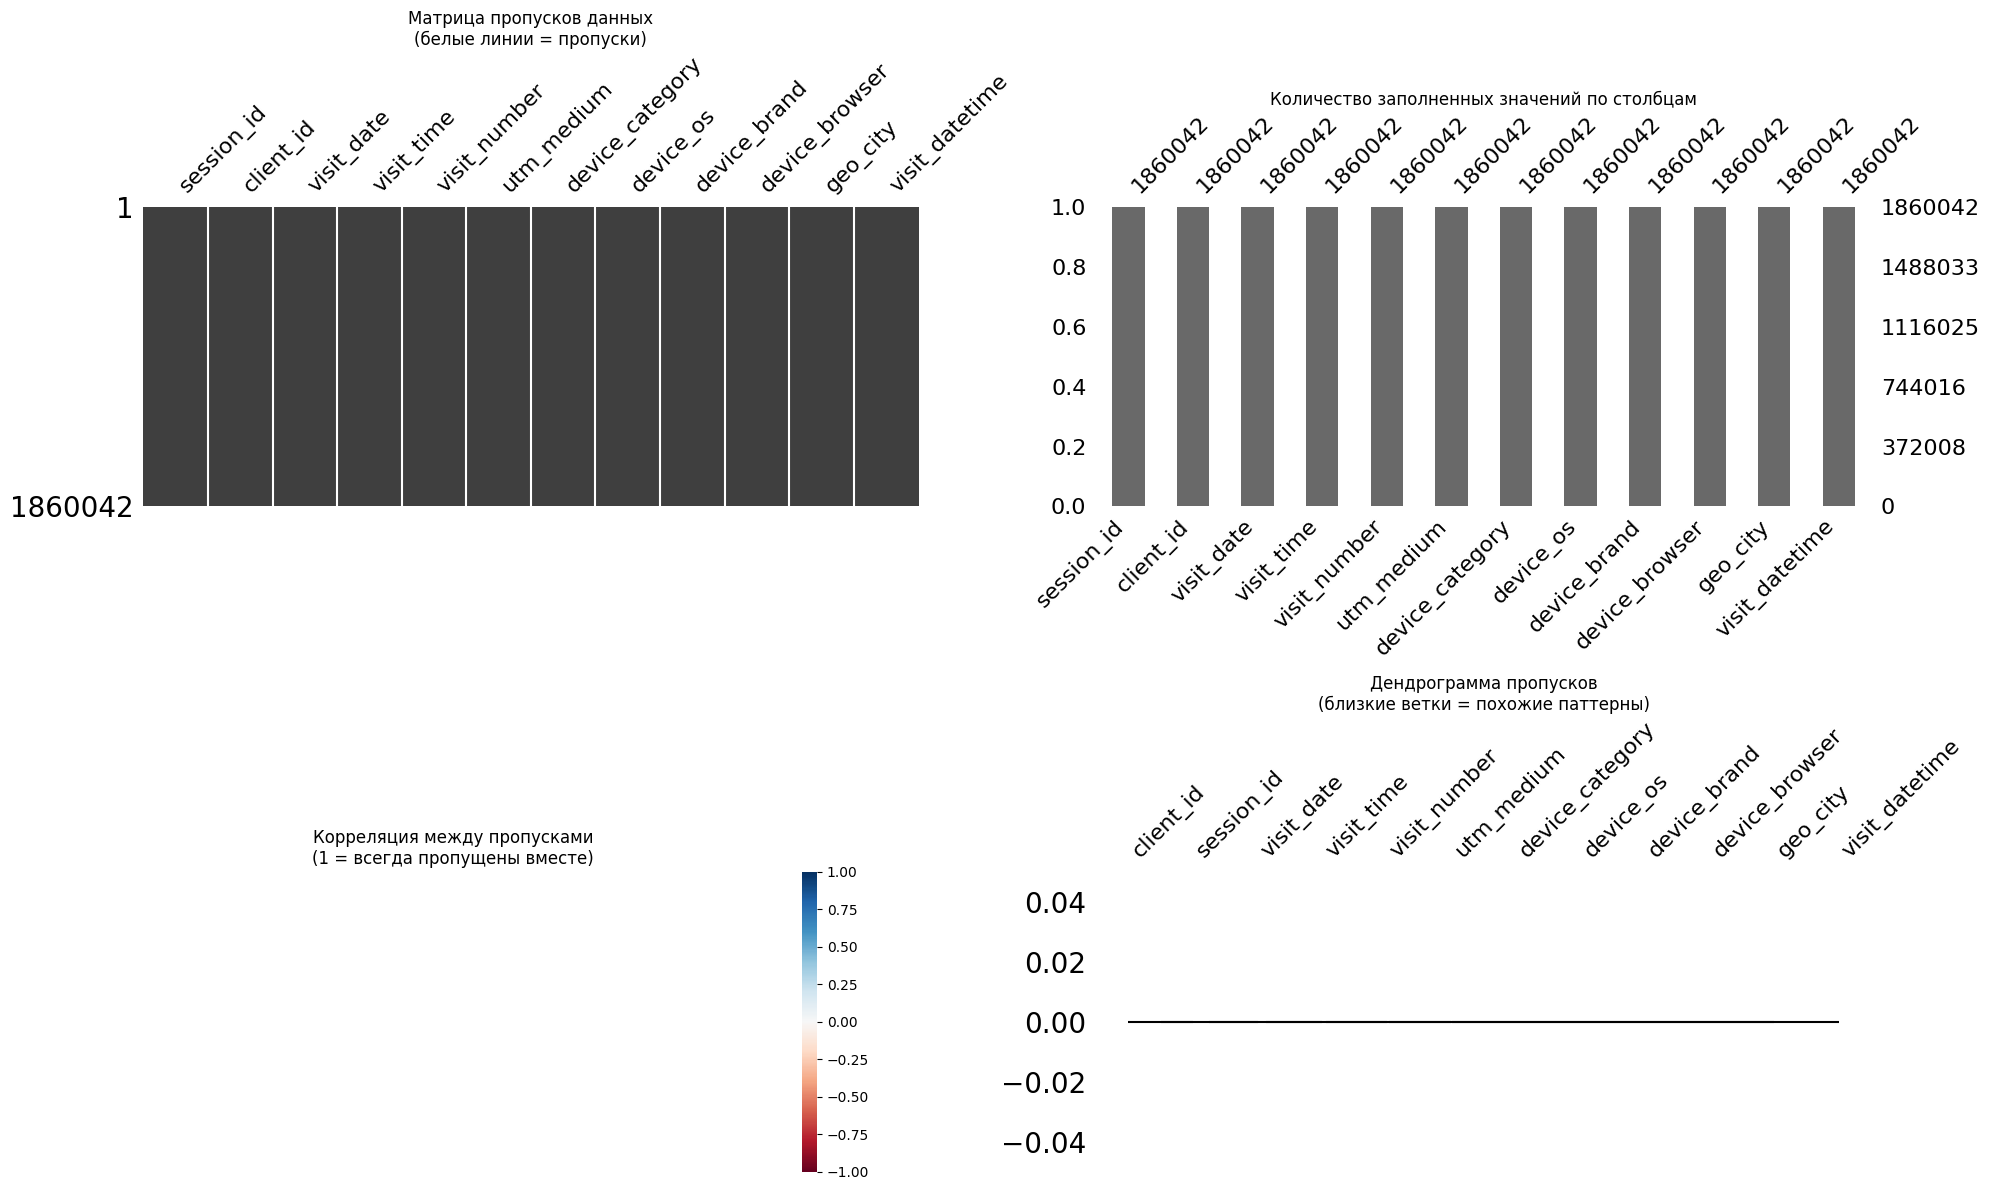


Статистика пропусков:
  ✅ Пропуски отсутствуют!


In [8]:
# Анализ пропусков с помощью missingno
print("Анализ пропусков данных с помощью missingno")
print(f"Размер данных: {df_sessions_clean.shape}")

# Создаем фигуру с несколькими субплотами
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# 1. Matrix plot - основная визуализация пропусков
plt.subplot(2, 2, 1)
missingno.matrix(df_sessions_clean, ax=plt.gca(), sparkline=False)
plt.title('Матрица пропусков данных\n(белые линии = пропуски)', fontsize=12)

# 2. Bar plot - количество заполненных значений по столбцам
plt.subplot(2, 2, 2)
missingno.bar(df_sessions_clean, ax=plt.gca())
plt.title('Количество заполненных значений по столбцам', fontsize=12)

# 3. Heatmap - корреляция между пропусками
plt.subplot(2, 2, 3)
missingno.heatmap(df_sessions_clean, ax=plt.gca())
plt.title('Корреляция между пропусками\n(1 = всегда пропущены вместе)', fontsize=12)

# 4. Dendrogram - кластеризация столбцов по паттернам пропусков
plt.subplot(2, 2, 4)
missingno.dendrogram(df_sessions_clean, ax=plt.gca())
plt.title('Дендрограмма пропусков\n(близкие ветки = похожие паттерны)', fontsize=12)

plt.tight_layout()
plt.show()

# Статистика пропусков
missing_stats = df_sessions_clean.isnull().sum()
missing_percent = (missing_stats / len(df_sessions_clean)) * 100

print("\nСтатистика пропусков:")
for col in missing_stats[missing_stats > 0].index:
    count = missing_stats[col]
    percent = missing_percent[col]
    print(f"  {col}: {count:,} ({percent:.2f}%)")

if missing_stats.sum() == 0:
    print("  ✅ Пропуски отсутствуют!")

In [9]:
# Анализ пропусков в событиях
missing_hits = df_hits_clean.isnull().sum()
missing_percent = (missing_hits / len(df_sessions)) * 100

print("Пропуски в событиях:")
for col, count in missing_hits[missing_hits > 0].items():
    print(f"  {col}: {count:,} ({missing_percent[col]:.1f}%)")

Пропуски в событиях:
  hit_time: 9,037,086 (485.9%)
  hit_referer: 6,179,144 (332.2%)
  event_label: 3,674,775 (197.6%)
  event_value: 15,500,608 (833.3%)


In [10]:
# Создаем копию для очистки
df_hits_clean = df_hits_clean.copy()

# Удаление проблемных столбцов с пропусками
df_hits_clean = df_hits_clean.drop(columns=['hit_time', 'hit_referer', 'event_label', 'event_value'])

print(f"Удалены столбцы: 'hit_time', 'hit_referer', 'event_label', 'event_value'")

Удалены столбцы: 'hit_time', 'hit_referer', 'event_label', 'event_value'


Анализ пропусков данных с помощью missingno
Размер данных: (15500608, 7)


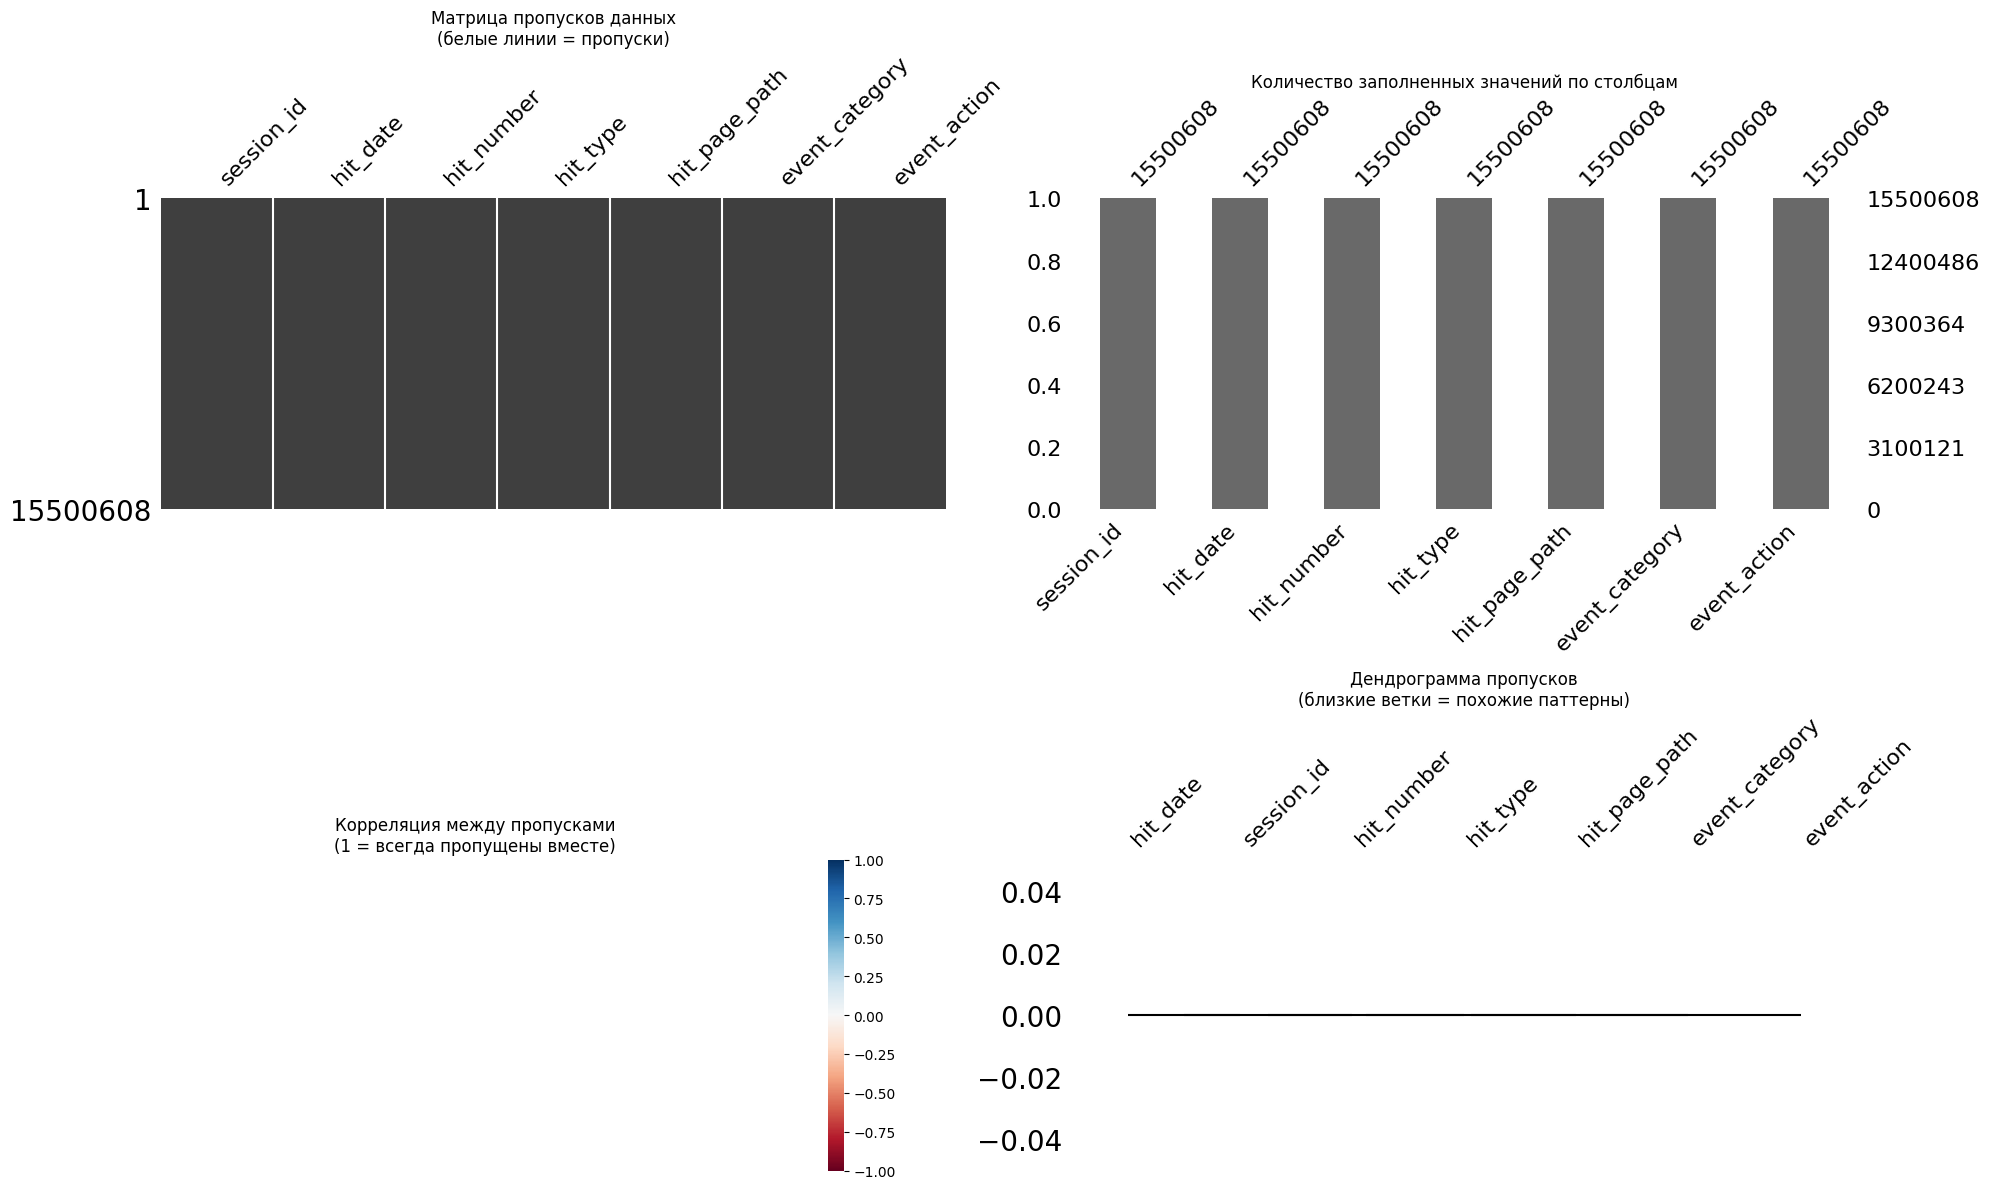


Статистика пропусков:
  ✅ Пропуски отсутствуют!


In [11]:
# Анализ пропусков с помощью missingno
print("Анализ пропусков данных с помощью missingno")
print(f"Размер данных: {df_hits_clean.shape}")

# Создаем фигуру с несколькими субплотами
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# 1. Matrix plot - основная визуализация пропусков
plt.subplot(2, 2, 1)
missingno.matrix(df_hits_clean, ax=plt.gca(), sparkline=False)
plt.title('Матрица пропусков данных\n(белые линии = пропуски)', fontsize=12)

# 2. Bar plot - количество заполненных значений по столбцам
plt.subplot(2, 2, 2)
missingno.bar(df_hits_clean, ax=plt.gca())
plt.title('Количество заполненных значений по столбцам', fontsize=12)

# 3. Heatmap - корреляция между пропусками
plt.subplot(2, 2, 3)
missingno.heatmap(df_hits_clean, ax=plt.gca())
plt.title('Корреляция между пропусками\n(1 = всегда пропущены вместе)', fontsize=12)

# 4. Dendrogram - кластеризация столбцов по паттернам пропусков
plt.subplot(2, 2, 4)
missingno.dendrogram(df_hits_clean, ax=plt.gca())
plt.title('Дендрограмма пропусков\n(близкие ветки = похожие паттерны)', fontsize=12)

plt.tight_layout()
plt.show()

# Статистика пропусков
missing_stats = df_hits_clean.isnull().sum()
missing_percent = (missing_stats / len(df_hits_clean)) * 100

print("\nСтатистика пропусков:")
for col in missing_stats[missing_stats > 0].index:
    count = missing_stats[col]
    percent = missing_percent[col]
    print(f"  {col}: {count:,} ({percent:.2f}%)")

if missing_stats.sum() == 0:
    print("  ✅ Пропуски отсутствуют!")

In [12]:
# Анализ размеров таблиц перед объединением
print("АНАЛИЗ РАЗМЕРОВ ТАБЛИЦ:")
print("=" * 40)

sessions_shape = df_sessions_clean.shape
hits_shape = df_hits_clean.shape

print(f"📊 Размеры таблиц:")
print(f"  df_sessions_clean: {sessions_shape[0]:,} строк × {sessions_shape[1]} столбцов")
print(f"  df_hits_clean: {hits_shape[0]:,} строк × {hits_shape[1]} столбцов")
print(f"  Разница в строках: {hits_shape[0] - sessions_shape[0]:,}")

# Анализ ключей объединения
sessions_ids = set(df_sessions_clean['session_id'].unique())
hits_ids = set(df_hits_clean['session_id'].unique())

print(f"\n🔑 Уникальные session_id:")
print(f"  В sessions: {len(sessions_ids):,}")
print(f"  В hits: {len(hits_ids):,}")

# Анализ пересечений
common_ids = sessions_ids.intersection(hits_ids)
sessions_only = sessions_ids - hits_ids
hits_only = hits_ids - sessions_ids

print(f"\n🔗 Пересечения:")
print(f"  Общие session_id: {len(common_ids):,}")
print(f"  Только в sessions: {len(sessions_only):,}")
print(f"  Только в hits: {len(hits_only):,}")

# Покрытие
coverage_sessions = len(common_ids) / len(sessions_ids) * 100
coverage_hits = len(common_ids) / len(hits_ids) * 100

print(f"\n📈 Покрытие:")
print(f"  Сессии с событиями: {coverage_sessions:.1f}%")
print(f"  События с сессиями: {coverage_hits:.1f}%")

# Статистика событий на сессию
hits_per_session = df_hits_clean['session_id'].value_counts()
print(f"\n📊 События на сессию:")
print(f"  Среднее: {hits_per_session.mean():.1f}")
print(f"  Медиана: {hits_per_session.median():.1f}")
print(f"  Максимум: {hits_per_session.max():,}")
print(f"  Минимум: {hits_per_session.min()}")

АНАЛИЗ РАЗМЕРОВ ТАБЛИЦ:
📊 Размеры таблиц:
  df_sessions_clean: 1,860,042 строк × 12 столбцов
  df_hits_clean: 15,500,608 строк × 7 столбцов
  Разница в строках: 13,640,566

🔑 Уникальные session_id:
  В sessions: 1,860,042
  В hits: 1,734,610

🔗 Пересечения:
  Общие session_id: 1,732,266
  Только в sessions: 127,776
  Только в hits: 2,344

📈 Покрытие:
  Сессии с событиями: 93.1%
  События с сессиями: 99.9%

📊 События на сессию:
  Среднее: 8.9
  Медиана: 4.0
  Максимум: 498
  Минимум: 1


In [13]:
df_sessions_clean.info(show_counts=True)
df_hits_clean.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   session_id       1860042 non-null  object        
 1   client_id        1860042 non-null  object        
 2   visit_date       1860042 non-null  object        
 3   visit_time       1860042 non-null  object        
 4   visit_number     1860042 non-null  int64         
 5   utm_medium       1860042 non-null  category      
 6   device_category  1860042 non-null  category      
 7   device_os        1860042 non-null  object        
 8   device_brand     1860042 non-null  object        
 9   device_browser   1860042 non-null  category      
 10  geo_city         1860042 non-null  category      
 11  visit_datetime   1860042 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](1), int64(1), object(6)
memory usage: 122.5+ MB
<class 'pandas.core.frame.DataFra

In [16]:
# Импортируем необходимые модули
import os
from google.colab import drive

# Подключаем Google Drive (без повторного монтирования если уже подключен)
if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')

# Указываем путь для сохранения
output_dir = '/content/drive/MyDrive/Colab Data'  # Папка в вашем Google Диске

# Создаем папку, если её нет
os.makedirs(output_dir, exist_ok=True)

# Сохраняем DataFrame в CSV
try:
    # Сохранение без индекса
    df_hits_clean.to_csv(os.path.join(output_dir, 'hits_clean.csv'),
                        index=False,
                        encoding='utf-8')

    df_sessions_clean.to_csv(os.path.join(output_dir, 'sessions_clean.csv'),
                           index=False,
                           encoding='utf-8')

    print("Файлы успешно сохранены:")
    print(f"- {os.path.join(output_dir, 'hits_clean.csv')}")
    print(f"- {os.path.join(output_dir, 'sessions_clean.csv')}")

except Exception as e:
    print(f"Произошла ошибка при сохранении: {str(e)}")
    if not os.path.exists('/content/drive'):
        print("Возможно, Google Drive не подключен")

Файлы успешно сохранены:
- /content/drive/MyDrive/Colab Data/hits_clean.csv
- /content/drive/MyDrive/Colab Data/sessions_clean.csv


In [18]:
# Удаление столбцов для уменьшения размера файла
df_sessions_clean = df_sessions_clean.drop(columns=['visit_date', 'visit_time', 'device_category', 'device_os', 'device_brand', 'device_browser', 'geo_city'])

print(f"\nРезультат очистки:")
print(f"Форма данных: {df_sessions_clean.shape}")


Результат очистки:
Форма данных: (1860042, 5)


In [19]:
# Объединение таблиц
# Используем left join, так как хотим сохранить все строки из df_hits_clean
df_merged = pd.merge(
    df_hits_clean,
    df_sessions_clean,
    on='session_id',
    how='left',  # left join - сохраняем все строки из левой таблицы (hits)
    suffixes=('_hit', '_session')  # суффиксы для одинаковых названий столбцов
)

# Проверка результата
print(f"Исходное количество строк в df_hits_clean: {len(df_hits_clean)}")
print(f"Количество строк после объединения: {len(df_merged)}")
print("\nПервые 5 строк объединенной таблицы:")
display(df_merged.head())

# Сохранение результата в Google Drive
output_path = '/content/drive/MyDrive/Colab Data/merged_sessions_hits.parquet'
df_merged.to_parquet(output_path, engine='pyarrow')
print(f"\nОбъединенная таблица сохранена в: {output_path}")

Исходное количество строк в df_hits_clean: 15500608
Количество строк после объединения: 15500608

Первые 5 строк объединенной таблицы:


,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,client_id,visit_number,utm_medium,visit_datetime
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,1313077071.1640254048,2.0,cpc,2021-12-23 13:07:36
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,1804519513.1640268211,2.0,cpm,2021-12-23 17:51:49
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,206134792.1640235808,1.0,cpc,2021-12-23 08:03:27
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,33184467.1620742935,9.0,cpc,2021-12-23 01:10:14
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,803285769.1640265077,1.0,direct,2021-12-23 16:11:18



Объединенная таблица сохранена в: /content/drive/MyDrive/merged_sessions_hits.parquet


In [20]:
# Сохраняем DataFrame в CSV
try:
    # Сохранение без индекса
    df_merged.to_csv(os.path.join(output_dir, 'merged_sessions_hits.csv'),
                        index=False,
                        encoding='utf-8')


    print("Файлы успешно сохранены:")
    print(f"- {os.path.join(output_dir, 'merged_sessions_hits.csv')}")

except Exception as e:
    print(f"Произошла ошибка при сохранении: {str(e)}")
    if not os.path.exists('/content/drive'):
        print("Возможно, Google Drive не подключен")

Файлы успешно сохранены:
- /content/drive/MyDrive/Colab Data/merged_sessions_hits.csv


In [21]:
df_merged.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500608 entries, 0 to 15500607
Data columns (total 11 columns):
 #   Column          Non-Null Count     Dtype         
---  ------          --------------     -----         
 0   session_id      15500608 non-null  object        
 1   hit_date        15500608 non-null  object        
 2   hit_number      15500608 non-null  int64         
 3   hit_type        15500608 non-null  object        
 4   hit_page_path   15500608 non-null  object        
 5   event_category  15500608 non-null  object        
 6   event_action    15500608 non-null  object        
 7   client_id       15459382 non-null  object        
 8   visit_number    15459382 non-null  float64       
 9   utm_medium      15459382 non-null  category      
 10  visit_datetime  15459382 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 1.2+ GB
